# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Fairuz Rafida
- **Email:** fairuz.rafida@lintasarta.co.id
- **ID Dicoding:** fayfairuz

## Menentukan Pertanyaan Bisnis

- Apa kota dengan tingkat polusi udara PM2.5 dan PM10 rata-rata tertinggi dan terendah?
- Apakah terdapat pola spesifik dalam tingkat polusi udara PM2.5 berdasarkan waktu?
- Bagaimana kecenderungan arah angin dan kecepatan angin pada setiap stasiun berdasarkan bulan?
- Bagaimana pola curah hujan di semua kota?

## Import Semua Packages/Library yang Digunakan

Mengimpor library yang dibutuhkan untuk proses analisis data, seperti Pandas untuk manipulasi data, Matplotlib untuk visualisasi, dan Numpy untuk perhitungan numerik.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import numpy as np

## Data Wrangling

### Gathering Data

#### Memuat dan menyatukan data

Program ini digunakan untuk membaca dan menggabungkan beberapa file CSV yang terdapat dalam folder `/content/`. Program ini akan mencari semua file dalam folder tersebut, kemudian setiap file CSV dibaca menjadi DataFrame dan disimpan ke dalam list `ls`. Setelah semua file CSV dimuat, seluruh DataFrame tersebut digabungkan menjadi satu DataFrame besar menggunakan `pd.concat()`. Terakhir, kolom `No` dihapus dari DataFrame gabungan karena dianggap tidak diperlukan dalam proses analisis selanjutnya.


In [2]:
path = '/content/'
files = [f for f in listdir(path) if isfile(join(path, f))]
ls = []
for filename in files:
  df = pd.read_csv(join(path, filename), index_col=None, header=0)
  ls.append(df)

data = pd.concat(ls, axis=0, ignore_index=True)
data = data.drop('No', axis=1)

#### Transformasi Data Arah Angin

Data pada kolom `wd` (wind direction/arah angin) awalnya masih menggunakan kode mata angin seperti `N`, `NE`, `E`, `SE`, `S`, `SW`, `W`, dan `NW`. Untuk mempermudah proses analisis dan visualisasi kecenderungan arah angin, kode mata angin tersebut diubah menjadi nilai numerik berupa derajat (0° - 360°) sesuai dengan standar arah mata angin. Transformasi ini bertujuan agar data arah angin dapat dianalisis secara kuantitatif, seperti melihat pola penyebaran polusi berdasarkan arah angin tertentu.


In [3]:
data['wd'].unique()

array(['E', 'ENE', 'NNE', 'N', 'NNW', 'NW', 'NE', 'SW', 'SSW', 'WSW',
       'ESE', 'SE', 'S', 'WNW', 'SSE', 'W', nan], dtype=object)

In [4]:
data.loc[data['wd'] == 'N', 'wd'] = 0
data.loc[data['wd'] == 'E', 'wd'] = 90
data.loc[data['wd'] == 'S', 'wd'] = 180
data.loc[data['wd'] == 'W', 'wd'] = 270
data.loc[data['wd'] == 'WNW', 'wd'] = 292.5
data.loc[data['wd'] == 'NNW', 'wd'] = 337.5
data.loc[data['wd'] == 'NW', 'wd'] = 315
data.loc[data['wd'] == 'NNE', 'wd'] = 22.5
data.loc[data['wd'] == 'NE', 'wd'] = 45
data.loc[data['wd'] == 'ESE', 'wd'] = 112.5
data.loc[data['wd'] == 'SE', 'wd'] = 135
data.loc[data['wd'] == 'ENE', 'wd'] = 67.5
data.loc[data['wd'] == 'SSE', 'wd'] = 157.5
data.loc[data['wd'] == 'WSW', 'wd'] = 246.5
data.loc[data['wd'] == 'SW', 'wd'] = 225
data.loc[data['wd'] == 'SSW', 'wd'] = 205.5
data.loc[data['wd'] == 'WSW', 'wd'] = 247.5
data['wd'] = pd.to_numeric(data['wd'])

In [5]:
data.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,90.0,0.5,Dingling
1,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,67.5,0.7,Dingling
2,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,67.5,0.2,Dingling
3,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,22.5,1.0,Dingling
4,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,0.0,2.1,Dingling


In [6]:
data.shape

(420768, 17)

**Insight:**
- Dalam data ini terdapat 17 kolom dengan 420.768 baris data
- Kolom yang ada dalam data ini meliputi :

  1. year : tahun data diambil
  2. month : bulan data diambil dengan format numerik (1-12)
  3. day : tanggal data diambil
  4. hour : waktu data diambil
  5. PM2.5 : Partikel halus dengan diameter ≤ 2.5 µm (mikrometer)
  6. PM10 : Partikel kasar dengan diameter ≤ 10 µm (mikrometer)
  7. SO2 : Gas yang berasal dari pembakaran bahan bakar fosil (batubara, minyak)
  8. NO2 : Gas hasil pembakaran kendaraan dan industri
  9. CO : Gas tidak berwarna dan tidak berbau dari pembakaran tidak sempurna
  10. O3 : Ozon troposfer (di permukaan bumi) yang terbentuk dari reaksi fotokimia
  11. TEMP : Suhu udara
  12. PRES : Tekanan udara
  13. DEWP : Kelembapan udara
  14. RAIN : Curah hujan
  15. wd : Arah angin
  16. WSPM : Kecepatan angin
  17. station : Stasiun meteorologi tempat data diambil

- Nilai pada parameter arah angin (wd) perlu diganti dengan nilai numerik sesuai dengan derajat arah mata anginnya untuk memudahkan proses analisis
- Parameter dalam data tersebut dapat dibagi menjadi 3 kategori :
  - Parameter waktu meliputi year, month, day, dan hour
  - Parameter polutan udara meliputi PM2.5, PM10, SO2, NO2, CO, dan O3
  - Parameter meteorologi meliputi TEMP, PRES, DEWP, RAIN, wd, WSPM, dan station


### Assessing Data

Data yang dimuat masih merupakan data mentah atau `raw`. Sehingga perlu dilakukan pemeriksaan terhadap data tersebut sehingga dapat dilihat apakah data tersebut masih memiliki nilai `null`, terdapat `duplikasi`, atau terdapat `outlier` di dalam data

In [7]:
data.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701
O3,13277


In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
# Select only numerical columns from the DataFrame
numerical_data = data.select_dtypes(include=np.number)

# Calculate percentiles using the numerical data
q25, q75 = np.percentile(numerical_data, 25), np.percentile(numerical_data, 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off


# Find outliers in the numerical data
outliers = numerical_data[(numerical_data < minimum) | (numerical_data > maximum)].any(axis=1)
outliers_data = numerical_data[outliers]
outliers_data

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM


**Insight:**
- Masih terdapat missing value pada beberapa parameter
- Tidak terdapat duplikasi dalam data
- Tidak terdapat outlier dalam data

### Cleaning Data

Pada proses ini, data yang memiliki nilai kosong (missing value) ditangani menggunakan metode interpolasi linear (`linear interpolation`). Teknik ini akan mengisi nilai kosong berdasarkan garis lurus (linear) dari nilai sebelum dan sesudahnya. Setelah proses interpolasi dilakukan, fungsi `data.isnull().sum()` digunakan untuk memastikan bahwa seluruh missing value pada dataset telah berhasil diisi sehingga data menjadi lengkap dan siap untuk dianalisis lebih lanjut.

Karena data tidak memiliki duplikasi ataupun outlier, maka penanganan untuk masalah ini tidak dilakukan.

In [10]:
data.interpolate(method='linear', limit_direction='forward', inplace=True)
data.isnull().sum()

<ipython-input-10-2766f9bedf5a>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', limit_direction='forward', inplace=True)


,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,2
CO,0
O3,0


**Insight:**
- Cleaning data yang sesuai dengan kebutuhan data adalah metode interpolation agar tidak membuat data kehilangan informasi yang mungkin diperlukan namun tetap mengisi data yang hilang (missing value)
- Setelah melakukan interpolation pada data yang hilang, data yang diperoleh adalah data yang tidak memiliki missing value lagi.
- Untuk duplicate data dan outlier tidak dilakukan cleaning data karena tidak terjadi pada data Air Quality ini

## Exploratory Data Analysis (EDA)

### Explore ...

Selanjutnya dilakukan proses ekplorasi awal. Proses ini bertujuan untuk melakukan eksplorasi awal terhadap data menggunakan analisis statistik deskriptif. Fungsi `data.describe(include='all')` digunakan untuk melihat ringkasan statistik seluruh kolom, baik numerik maupun non-numerik, seperti nilai minimum, maksimum, rata-rata, dan sebaran data. Selanjutnya, dilakukan analisis lebih spesifik pada parameter polutan udara (`PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3`) berdasarkan lokasi stasiun (`station`). Dengan fungsi `groupby('station').mean()`, diperoleh rata-rata kadar polutan pada setiap stasiun. Kemudian, `groupby('station').max()` digunakan untuk mengetahui nilai polutan tertinggi di masing-masing stasiun, dan `groupby('station').min()` untuk mengetahui nilai polutan terendah. Proses ini membantu dalam mengidentifikasi sebaran dan konsentrasi polutan di berbagai lokasi pengamatan.

In [11]:
data.describe(include='all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420766.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600033,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,157.590294,1.730034,NaN
std,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.171068,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,108.601838,1.246674,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,67.500000,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,135.000000,1.400000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,246.500000,2.200000,NaN


In [12]:
data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','station']].groupby('station').mean()

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626
Changping,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253
Dingling,66.845557,84.113713,11.797849,27.305033,925.111838,70.530792
Dongsi,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357
Guanyuan,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142
Gucheng,84.074802,119.261567,15.705821,55.831726,1338.100060,58.000001
Huairou,69.501747,92.422670,12.446681,32.077275,1019.671871,60.872173
Nongzhanguan,85.079472,109.384022,18.760102,58.095053,1327.767611,58.432876
Shunyi,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810


In [13]:
data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','station']].groupby('station').max()

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,898.0,984.0,341.0,290.0,10000.0,423.0000
Changping,882.0,999.0,310.0,226.0,10000.0,429.0000
Dingling,881.0,905.0,156.0,205.0,10000.0,500.0000
Dongsi,737.0,955.0,300.0,258.0,10000.0,1071.0000
Guanyuan,680.0,999.0,293.0,270.0,10000.0,415.0000
Gucheng,770.0,994.0,500.0,276.0,10000.0,450.0000
Huairou,762.0,993.0,315.0,231.0,10000.0,444.0000
Nongzhanguan,844.0,995.0,257.0,273.0,10000.0,390.0000
Shunyi,941.0,999.0,239.0,258.0,10000.0,351.7164


In [14]:
data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','station']].groupby('station').min()

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Aotizhongxin,3.0,2.0,0.2856,2.0000,100.0,0.2142
Changping,2.0,2.0,0.2856,1.8477,100.0,0.2142
Dingling,3.0,2.0,0.2856,1.0265,100.0,0.2142
Dongsi,3.0,2.0,0.2856,2.0000,100.0,0.6426
Guanyuan,2.0,2.0,1.0000,2.0000,100.0,0.2142
Gucheng,2.0,2.0,0.2856,2.0000,100.0,0.2142
Huairou,2.0,2.0,0.2856,1.0265,100.0,0.2142
Nongzhanguan,2.0,2.0,0.5712,2.0000,100.0,0.2142
Shunyi,2.0,2.0,0.2856,2.0000,100.0,0.2142


### Analisis Polusi Udara Berdasarkan Rentang Waktu (Manual Grouping)

Pada proses ini dilakukan analisis untuk mengetahui rata-rata konsentrasi polutan PM2.5 berdasarkan rentang waktu dalam sehari di setiap stasiun pemantauan. Proses ini merupakan penerapan teknik clustering sederhana dengan metode *manual grouping*, yaitu pengelompokan data berdasarkan aturan tertentu tanpa algoritma clustering otomatis.

Data dikelompokkan berdasarkan jam (`hour`) ke dalam empat kategori waktu, yaitu:  
- `Morning` (pagi) untuk jam 06.00 - 11.00  
- `Afternoon` (siang) untuk jam 12.00 - 16.00  
- `Evening` (sore/malam) untuk jam 17.00 - 23.00  
- `Night` (dini hari) untuk jam 00.00 - 05.00  

Setelah menentukan kelompok waktu tersebut, data digabungkan (`groupby`) berdasarkan lokasi stasiun (`station`) dan rentang waktu (`time_span`). Selanjutnya dilakukan perhitungan rata-rata konsentrasi PM2.5 untuk setiap kelompok tersebut. Kolom `hour` yang sudah tidak dibutuhkan dihapus untuk merapikan data. Hasil akhir dari proses ini adalah informasi tentang rata-rata konsentrasi PM2.5 di masing-masing stasiun berdasarkan rentang waktu tertentu, yang bermanfaat untuk mengidentifikasi pola sebaran polusi udara berdasarkan waktu dalam sehari.
# New Section

In [15]:
# Penentuan rentang waktu dari masing-masing jam
data['time_span'] = data.hour.apply(lambda x: "Morning" if x >= 6 and x<=11
                                          else ("Afternoon" if x >= 12 and x<=16
                                                else ("Evening" if x >=17 and x<=23 else "Night")))
# Penggabungan berdasarkan rentang waktu
timespan_particle_df = data.groupby(by=["station", "time_span"]).agg({
        "hour" : "first",
        "PM2.5":"mean"
    })
# timespan_particle_df['index'] = timespan_particle_df.hour.apply(lambda x: 0 if x >= 6 and x<=11
#                                           else (1 if x >= 12 and x<=16
#                                                 else (2 if x >=17 and x<=23 else 3)))

# timespan_particle_df= timespan_particle_df.sort_values(by = ['index'], ascending =True)
# timespan_particle_df = timespan_particle_df.reset_index()
timespan_particle_df = timespan_particle_df.drop(columns={"hour"})

timespan_particle_df

PM2.5
station       time_span           
Aotizhongxin  Afternoon  77.108761
              Evening    84.875117
              Morning    78.381221
              Night      88.502999
Changping     Afternoon  70.746751
              Evening    74.469417
              Morning    69.583843
              Night      68.525296
Dingling      Afternoon  69.853136
              Evening    70.359494
              Morning    63.202735
              Night      63.882468
Dongsi        Afternoon  79.126147
              Evening    90.491735
              Morning    80.373242
              Night      92.691584
Guanyuan      Afternoon  77.786255
              Evening    86.627088
              Morning    78.719939
              Night      86.983333
Gucheng       Afternoon  78.589433
              Evening    94.041161
              Morning    76.758709
              Night      84.334616
Huairou       Afternoon  66.335437
              Evening    76.870021
              Morning    64.452500
              Night      68.593264
Nongzhanguan  Afternoon  78.667198
              Evening    86.573036
              Morning    81.230348
              Night      92.529666
Shunyi        Afternoon  72.552500
              Evening    85.287385
              Morning    72.604649
              Night      85.184834
Tiantan       Afternoon  78.039896
              Evening    83.428897
              Morning    79.264041
              Night      86.501387
Wanliu        Afternoon  77.289477
              Evening    87.129086
              Morning    80.405107
              Night      87.406844
Wanshouxigong Afternoon  78.751551
              Evening    89.768926
              Morning    79.918826
              Night      89.994660

### Analisis Curah Hujan Rata-rata Berdasarkan Stasiun Meteorologi

Pada proses ini dilakukan analisis untuk mengetahui rata-rata curah hujan (`RAIN`) di setiap stasiun pemantauan meteorologi. Data dikelompokkan (`groupby`) berdasarkan `station` atau lokasi stasiun, kemudian dihitung nilai rata-rata (`mean`) dari curah hujan yang tercatat pada masing-masing stasiun tersebut. Hasil dari proses ini dapat digunakan untuk membandingkan tingkat curah hujan antar stasiun, serta menjadi salah satu faktor pendukung dalam analisis kualitas udara.


In [16]:
# Penggabungan berdasarkan rentang stasiun metorologi
rain_df = data.groupby(by=["station"]).agg({
        "RAIN":"mean"
    })

rain_df

,RAIN
station,
Aotizhongxin,0.067383
Changping,0.060293
Dingling,0.060293
Dongsi,0.063983
Guanyuan,0.067383
Gucheng,0.064374
Huairou,0.067950
Nongzhanguan,0.063983
Shunyi,0.061010


**Insight:**
- Dari data mean, semua stasiun meteorologi dapat dikatakan memiliki kualitas udara yang buruk. Dilihat dari nilai PM2.5, PM10, NO2, serta CO yang melebihi batas aman harian yang ditetapkan oleh WHO. Namun nilai SO2 dan O3 masih dibawah batas aman.
- Semua parameter pada semua kota memiliki nilai tertinggi yang melebihi batas aman
- Semua parameter pada semua kota memiliki nilai minimum yang dibawah batas aman
- Tidak ada kecendrungan peningkatan PM2.5 berdasarkan waktu pagi, siang, sore, malam
- Berdasarkan data rata-rata kecepatan dan arah angin di kota Aotizhongxin, tidak ada perubahan yang kecepatan dan arah angin yang signifikan setiap bulannya
- Curah hujan rata-rata untuk semua stasiun berada di antara 0,06 - 0,069

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa kota dengan tingkat polusi udara PM2.5 dan PM10 rata-rata tertinggi dan terendah?

#### Visualisasi Rata-rata PM2.5 dan PM10 di Setiap Stasiun

Pada proses ini dilakukan visualisasi untuk membandingkan nilai rata-rata polutan PM2.5 dan PM10 di setiap stasiun pemantauan kualitas udara. Data terlebih dahulu dikelompokkan (`groupby`) berdasarkan stasiun (`station`) dan dihitung nilai rata-ratanya untuk parameter PM2.5 dan PM10.

Visualisasi dilakukan menggunakan diagram batang (bar chart) dimana setiap stasiun memiliki dua batang yang merepresentasikan rata-rata nilai PM2.5 dan PM10. Visualisasi ini memudahkan untuk melihat perbandingan tingkat polusi antar stasiun, serta membantu mengidentifikasi stasiun mana yang memiliki rata-rata konsentrasi polutan lebih tinggi dibandingkan lainnya. Teknik visualisasi ini juga memberikan insight awal dalam proses eksplorasi data sebelum dilakukan analisis lebih lanjut.


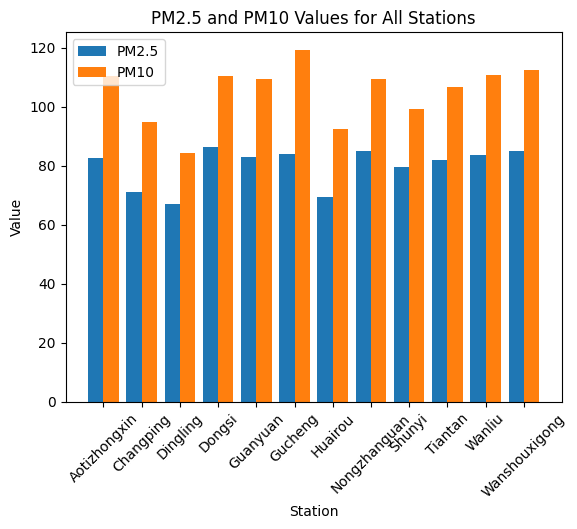

In [17]:
pm_df = data.groupby(['station']).agg({
    'PM2.5' : 'mean',
    'PM10' : 'mean'
})

X_axis = np.arange(len(pm_df.index))

plt.bar(X_axis - 0.2, pm_df['PM2.5'], 0.4, label = 'PM2.5')
plt.bar(X_axis + 0.2, pm_df['PM10'], 0.4, label = 'PM10')

plt.xticks(X_axis, pm_df.index)
plt.xlabel("Station")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.title("PM2.5 and PM10 Values ​​for All Stations")
plt.legend()
plt.show()

### Pertanyaan 2: Apakah terdapat pola spesifik dalam tingkat polusi udara PM2.5 berdasarkan waktu?

#### Clustering Manual Berdasarkan Rentang Waktu untuk Analisis PM2.5

Pada proses ini diterapkan teknik *clustering* secara manual, yaitu pengelompokkan data berdasarkan rentang waktu tertentu. Data waktu (`hour`) dikelompokkan menjadi empat kategori waktu: *Morning* (06:00-11:00), *Afternoon* (12:00-16:00), *Evening* (17:00-23:00), dan *Night* (00:00-05:00). Proses ini bertujuan untuk melihat kecenderungan nilai rata-rata PM2.5 pada setiap stasiun berdasarkan rentang waktu tersebut.

Setelah dilakukan pengelompokkan, data di-*grouping* berdasarkan `station` dan `time_span` kemudian dihitung nilai rata-rata PM2.5 pada setiap kelompok. Hasilnya divisualisasikan dalam bentuk line chart, dimana sumbu x menunjukkan rentang waktu, sedangkan sumbu y menunjukkan nilai PM2.5. Setiap garis mewakili masing-masing stasiun. Visualisasi ini berguna untuk mengidentifikasi pola perubahan konsentrasi PM2.5 berdasarkan waktu pada setiap stasiun pemantauan.


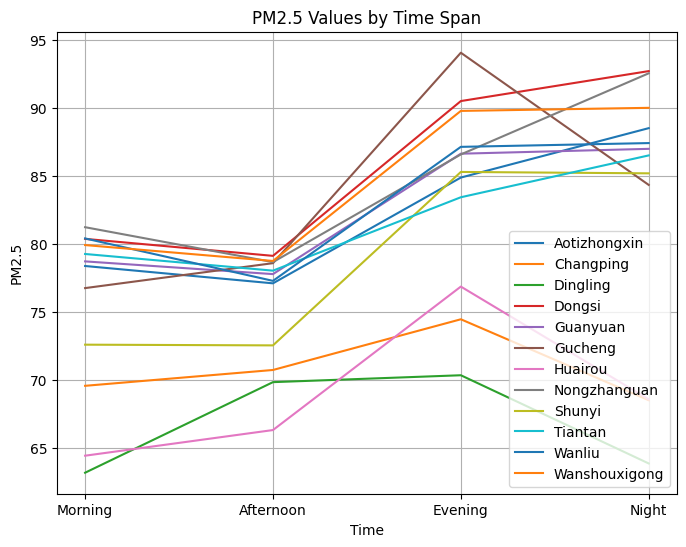

In [18]:
# Penentuan rentang waktu dari masing-masing jam
data['time_span'] = data.hour.apply(lambda x: "Morning" if x >= 6 and x<=11
                                          else ("Afternoon" if x >= 12 and x<=16
                                                else ("Evening" if x >=17 and x<=23 else "Night")))
# Penggabungan berdasarkan rentang waktu
timespan_particle_df = data.groupby(by=["station", "time_span"]).agg({
        "hour" : "first",
        "PM2.5":"mean"
    })
timespan_particle_df['index'] = timespan_particle_df.hour.apply(lambda x: 0 if x >= 6 and x<=11
                                          else (1 if x >= 12 and x<=16
                                                else (2 if x >=17 and x<=23 else 3)))

timespan_particle_df= timespan_particle_df.sort_values(by = ['index'], ascending =True)
# timespan_particle_df = timespan_particle_df.reset_index()
timespan_particle_df = timespan_particle_df.drop(columns={"hour"})
timespan_particle_df = timespan_particle_df.reset_index()
# timespan_particle_df
station_df = timespan_particle_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['time_span'], group['PM2.5'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('PM2.5')
ax.set_title('PM2.5 Values by Time Span')

# Defining and displaying all time axis ticks
ticks = ['Morning', 'Afternoon', 'Evening', 'Night']
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

#### Analisis Rata-rata PM2.5 Tahunan Setiap Stasiun

Proses ini dilakukan untuk melihat tren atau kecenderungan rata-rata nilai PM2.5 setiap tahunnya di masing-masing stasiun pemantauan. Data dikelompokkan (*grouping*) berdasarkan `station` dan `year`, kemudian dihitung nilai rata-rata PM2.5 pada masing-masing kelompok tersebut.

Hasil dari pengelompokkan ini divisualisasikan dalam bentuk line chart untuk memudahkan dalam menganalisis pergerakan atau pola perubahan nilai PM2.5 dari tahun ke tahun di setiap stasiun. Setiap garis pada grafik mewakili masing-masing stasiun pemantauan. Dengan adanya visualisasi ini, dapat dilihat apakah terjadi penurunan, kenaikan, atau fluktuasi nilai PM2.5 di masing-masing lokasi dalam periode waktu tahunan.


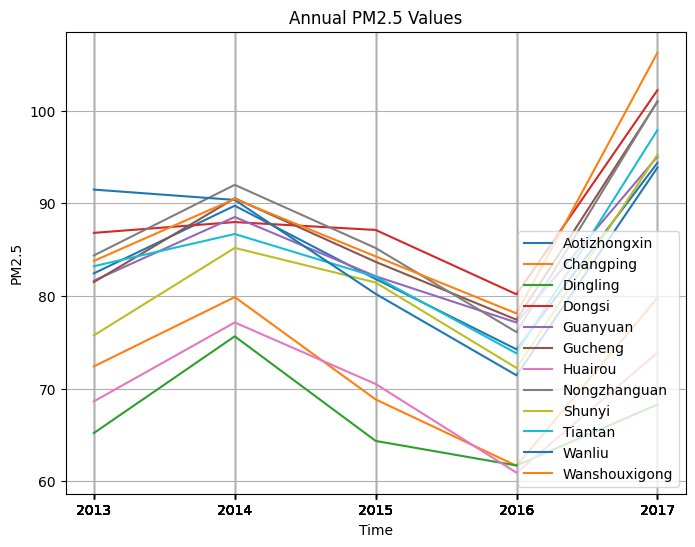

In [19]:
yearly_df = data.groupby(by=["station", "year"]).agg({
        "PM2.5":"mean"
    })
yearly_df = yearly_df.reset_index()

station_df = yearly_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['year'], group['PM2.5'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('PM2.5')
ax.set_title('Annual PM2.5 Values')

# Defining and displaying all time axis ticks
ticks = list(yearly_df['year'])
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

#### Analisis Rata-rata PM2.5 Bulanan Setiap Stasiun

Proses ini dilakukan untuk menganalisis pola rata-rata nilai PM2.5 pada setiap bulan di masing-masing stasiun pemantauan. Data dikelompokkan (*grouping*) berdasarkan `station` dan `month`, kemudian dihitung rata-rata nilai PM2.5 dari masing-masing kelompok.

Hasil pengelompokkan ini divisualisasikan dalam bentuk line chart agar lebih mudah dalam menganalisis pola fluktuasi atau pergerakan nilai PM2.5 setiap bulannya. Setiap garis pada grafik mewakili masing-masing stasiun pemantauan. Dengan visualisasi ini, dapat terlihat kecenderungan adanya peningkatan atau penurunan kadar PM2.5 pada bulan-bulan tertentu.

Selain itu, proses pengelompokan ini merupakan salah satu teknik *clustering* secara manual, yaitu pengelompokkan data berdasarkan atribut tertentu (dalam hal ini `station` dan `month`) untuk


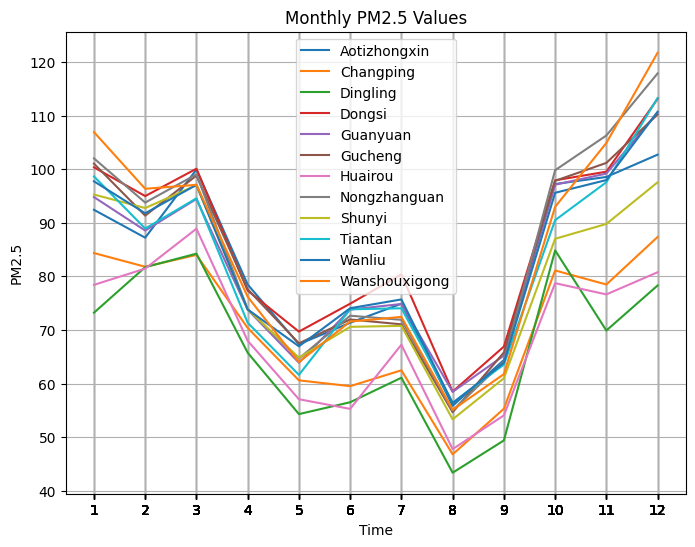

In [20]:
monthly_df = data.groupby(by=["station", "month"]).agg({
        "PM2.5":"mean"
    })
monthly_df = monthly_df.reset_index()

station_df = monthly_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['month'], group['PM2.5'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('PM2.5')
ax.set_title('Monthly PM2.5 Values')

# Defining and displaying all time axis ticks
ticks = list(monthly_df['month'])
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

#### Analisis Rata-rata PM2.5 Harian Setiap Stasiun

Pada proses ini dilakukan analisis terhadap rata-rata nilai PM2.5 setiap hari di masing-masing stasiun pemantauan. Data dikelompokkan (*grouping*) berdasarkan `station` dan `day`, kemudian dilakukan perhitungan rata-rata nilai PM2.5 pada masing-masing kelompok.

Proses *grouping* ini merupakan salah satu teknik *clustering* secara manual, yaitu pengelompokan data berdasarkan atribut tertentu untuk mengidentifikasi pola tertentu dalam data. Dalam hal ini, pengelompokan dilakukan berdasarkan nama stasiun dan hari pengukuran.

Hasil dari proses ini divisualisasikan dalam bentuk line chart untuk memudahkan dalam menganalisis fluktuasi atau pergerakan nilai PM2.5 setiap harinya. Setiap garis pada grafik mewakili masing-masing stasiun pemantauan. Dengan visualisasi ini, dapat diamati variasi nilai PM2.5 dari hari ke hari serta perbandingan nilai antar stasiun.


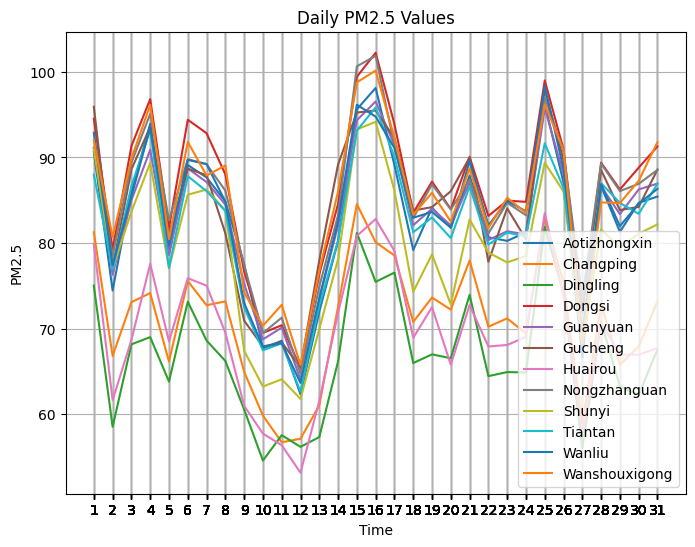

In [21]:
daily_df = data.groupby(by=["station", "day"]).agg({
        "PM2.5":"mean"
    })
daily_df = daily_df.reset_index()

station_df = daily_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['day'], group['PM2.5'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('PM2.5')
ax.set_title('Daily PM2.5 Values')

# Defining and displaying all time axis ticks
ticks = list(daily_df['day'])
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

#### Analisis Rata-rata PM2.5 Per Jam Setiap Stasiun

Pada proses ini dilakukan analisis terhadap rata-rata nilai PM2.5 pada masing-masing jam di setiap stasiun pemantauan. Data dikelompokkan (*grouping*) berdasarkan `station` dan `hour`, kemudian dihitung nilai rata-rata PM2.5 pada masing-masing kelompok tersebut.

Pengelompokan ini bertujuan untuk mengetahui pola atau tren konsentrasi PM2.5 dalam satu hari, yaitu melihat bagaimana perubahan nilai PM2.5 pada setiap jam dalam rentang waktu 24 jam. Teknik *grouping* ini termasuk salah satu bentuk *clustering* manual, dimana pengelompokan dilakukan berdasarkan stasiun pemantauan dan jam pengukuran.

Hasil analisis ini kemudian divisualisasikan dalam bentuk line chart, dimana masing-masing garis pada grafik merepresentasikan rata-rata nilai PM2.5 per jam di masing-masing stasiun. Dengan visualisasi ini, dapat diamati pola kenaikan atau penurunan nilai PM2.5 sepanjang hari serta perbandingan antara stasiun yang satu dengan stasiun lainnya.


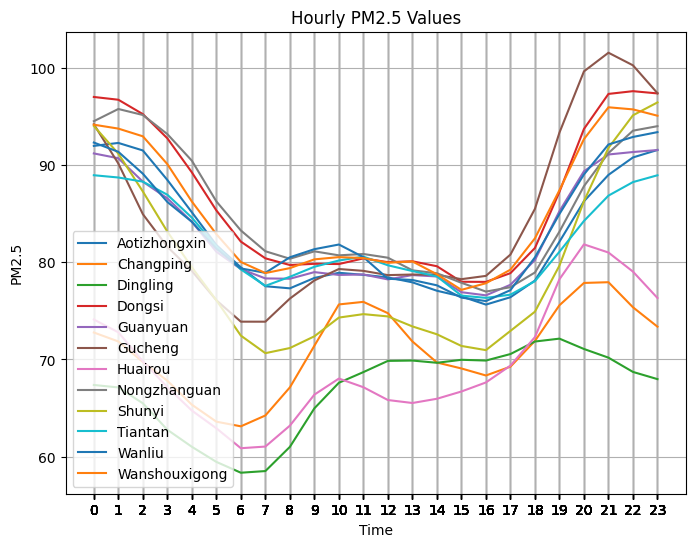

In [22]:
hourly_df = data.groupby(by=["station", "hour"]).agg({
        "PM2.5":"mean"
    })
hourly_df = hourly_df.reset_index()

station_df = hourly_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['hour'], group['PM2.5'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('PM2.5')
ax.set_title('Hourly PM2.5 Values')

# Defining and displaying all time axis ticks
ticks = list(hourly_df['hour'])
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

### Pertanyaan 3 : Bagaimana kecenderung arah angin dan kecepatan angin di semua kota setiap bulannya?

#### Analisis Rata-rata Arah Angin (Wind Direction) Per Bulan Setiap Stasiun

Pada proses ini dilakukan analisis terhadap rata-rata nilai arah angin (`wd` - *wind direction*) pada masing-masing bulan di setiap stasiun pemantauan. Data dikelompokkan (*grouping*) berdasarkan `station` dan `month`, kemudian dihitung nilai rata-rata arah angin pada masing-masing kelompok tersebut.

Pengelompokan ini bertujuan untuk mengetahui pola arah angin rata-rata tiap bulan pada setiap stasiun, serta untuk melihat perbandingan arah angin antar stasiun dalam satu tahun pengamatan.

Hasil analisis ini divisualisasikan dalam bentuk *line chart* dimana:
- Sumbu X menunjukkan bulan.
- Sumbu Y menunjukkan rata-rata arah angin dalam derajat (°).
- Setiap garis pada grafik merepresentasikan masing-masing stasiun pemantauan.

Dengan visualisasi ini, dapat diamati apakah terdapat perbedaan pola arah angin dari bulan ke bulan, serta perbedaan pola arah angin antar stasiun. Selain itu, pola arah angin ini juga bisa menjadi salah satu faktor yang mempengaruhi penyebaran polusi udara (seperti PM2.5) di wilayah tertentu.


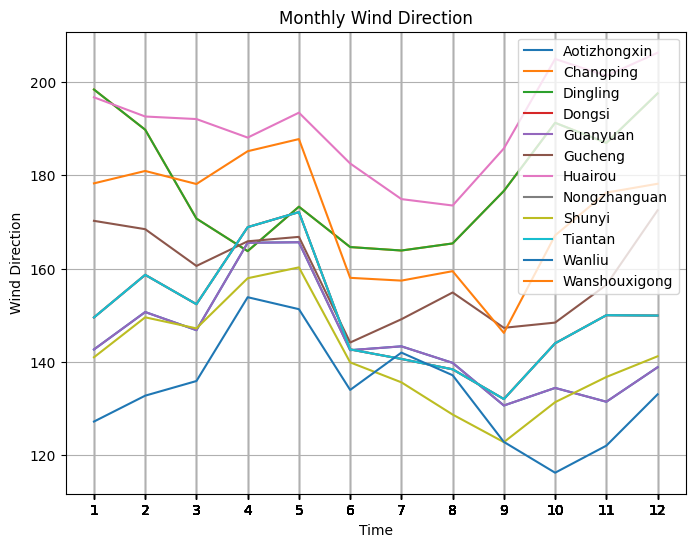

In [23]:
mountly_df = data.groupby(by=["station", 'month']).agg({
        "wd":"mean"
    })
mountly_df = mountly_df.reset_index()

station_df = mountly_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['month'], group['wd'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Wind Direction')
ax.set_title('Monthly Wind Direction')

# Defining and displaying all time axis ticks
ticks = list(mountly_df['month'])
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

#### Analisis Rata-rata Kecepatan Angin (Wind Speed) Per Bulan Setiap Stasiun

Pada proses ini dilakukan analisis terhadap rata-rata nilai kecepatan angin (`WSPM` - *Wind Speed*) per bulan pada masing-masing stasiun pemantauan kualitas udara. Data dikelompokkan (*grouping*) berdasarkan `station` dan `month`, kemudian dihitung rata-rata kecepatan angin pada setiap kelompok tersebut.

Analisis ini bertujuan untuk:
- Mengetahui pola variasi kecepatan angin dari bulan ke bulan.
- Membandingkan kecepatan angin antar stasiun pemantauan.
- Mengidentifikasi bulan dengan kecepatan angin tertinggi atau terendah.

Hasil analisis divisualisasikan dalam bentuk *line chart* dimana:
- Sumbu X menunjukkan bulan.
- Sumbu Y menunjukkan rata-rata kecepatan angin (dalam satuan m/s).
- Setiap garis pada grafik merepresentasikan masing-masing stasiun.

Visualisasi ini membantu dalam mengidentifikasi tren kecepatan angin di tiap stasiun, apakah ada pola musiman tertentu, dan bagaimana perbandingan kecepatan angin antar lokasi. Kecepatan angin juga merupakan salah satu faktor penting dalam penyebaran polusi udara, termasuk partikel PM2.5, karena semakin besar kecepatan angin maka partikel polusi dapat tersebar lebih jauh.


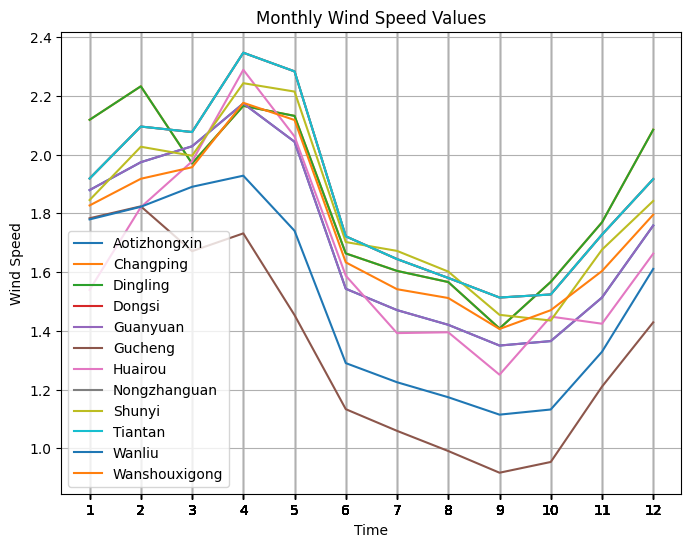

In [24]:
mountly_df = data.groupby(by=["station", 'month']).agg({
        "WSPM":"mean"
    })
mountly_df = mountly_df.reset_index()

station_df = mountly_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['month'], group['WSPM'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed')
ax.set_title('Monthly Wind Speed Values')

# Defining and displaying all time axis ticks
ticks = list(mountly_df['month'])
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

### Pertanyaan 4 : Bagaimana pola curah hujan di semua kota?

#### Analisis Rata-rata Curah Hujan (Rainfall) Per Bulan Setiap Stasiun

Pada analisis ini dilakukan pengelompokan data berdasarkan `station` dan `month` untuk menghitung rata-rata nilai curah hujan (`RAIN`) per bulan di setiap stasiun pemantauan kualitas udara.

Analisis curah hujan ini dilakukan untuk:
- Mengetahui pola curah hujan sepanjang tahun pada masing-masing stasiun.
- Membandingkan rata-rata curah hujan antar stasiun.
- Mengidentifikasi bulan dengan intensitas curah hujan tertinggi atau terendah.

Hasil analisis divisualisasikan dalam bentuk *line chart* dengan:
- Sumbu X menunjukkan bulan.
- Sumbu Y menunjukkan rata-rata curah hujan (dalam satuan mm).
- Setiap garis pada grafik merepresentasikan data dari masing-masing stasiun.

Informasi dari analisis ini dapat digunakan untuk mengetahui pengaruh curah hujan terhadap polusi udara, terutama konsentrasi PM2.5. Pada umumnya, curah hujan yang tinggi dapat membantu mengurangi konsentrasi polutan di udara karena proses pencucian atmosfer (*wet deposition*


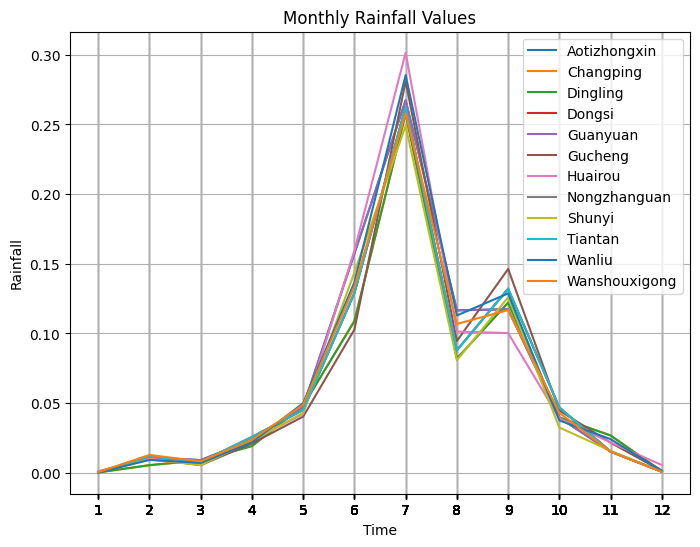

In [25]:
mountly_df = data.groupby(by=["station", 'month']).agg({
        "RAIN":"mean"
    })
mountly_df = mountly_df.reset_index()

station_df = mountly_df.groupby('station')

fig, ax = plt.subplots(figsize=(8, 6))
for key, group in station_df:
  ax.plot(group['month'], group['RAIN'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Rainfall')
ax.set_title('Monthly Rainfall Values')

# Defining and displaying all time axis ticks
ticks = list(mountly_df['month'])
plt.xticks(ticks)

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

**Insight:**
- Semua stasiun menunjukan pola yang sama dimana PM10 lebih tinggi daripada PM2.5.
- Kota Dongsi memiliki nilai PM2.5 tertinggi, sedangkan kota Dingling memiliki nilai PM2.5 terendah
- Kota Gucheng memiliki nilai PM10 tertinggi, sedangkan kota Dingling memiliki nilai PM10 terendah
- Bedasarkan data yang dibedakan menggunakan rentang waktu pagi, siang, sore, dan malam. Nilai PM2.5 mulai dari pagi hingga siang berada di sekitaran angka minimum rata-rata. Nilai PM2.5 tersebut meningkat di siang hari dan malam hari. Namun di beberapa stasiun meteorologi menunjukan penurunan nilai PM2.5 di malam hari.
- Pada data per tahunan, sebagian besar stasiun meteorologi memiliki pola PM2.5 yang sama yaitu meningkat dari tahun 2013 hingga 2014, lalu menurun hingga mencapai nilai terendah pada tahun 2016, dan meningkat tajam pada tahun 2017
- Pada data per bulan, sebagian besar stasiun metorologi memiliki pola PM2.5 menurun dari bulan januari dan meningkat Kembali dari bulan juni hingga juli. Lalu menurun pada bulan agustus dan mencapai titik terendah pada bulan tersebut. Lalu meningkat Kembali hingga bulai desember
- Pada data harian, Sebagian besar stasiun memiliki pola PM2.5 yang relatif sama yang naik turun setiap harinya, mencapai titik terendah sekitar tanggal 12, dan mencapai titik tertinggi sekitar tanggal 16.
- Pada data per jam, Sebagian besar stasiun memiliki pola PM2.5 yang relatif sama. Nilai PM2.5 tinggi pada jam 0 dan menurun hingga jam 6. Nilai PM2.5 mulai naik Kembali pada jam 17 hingga mencapai titik tertinggi sekitar jam 21.
- Arah angin di sebagian besar lokasi mengalami perubahan signifikan sepanjang tahun. Pada umumnya, arah angin cenderung bergerak ke arah tenggara (sekitar 140°-160°) pada bulan Mei hingga September. Sementara itu, pada bulan Oktober hingga April, arah angin cenderung bergeser ke arah selatan hingga barat daya (sekitar 160°-200°). Lokasi Huairou dan Dongsi menunjukkan variasi arah angin yang paling mencolok dibandingkan lokasi lainnya.
- Kecepatan angin di semua lokasi cenderung meningkat pada bulan Maret, April, dan Mei, dengan puncaknya di bulan April. Setelah itu, kecepatan angin menurun signifikan mulai bulan Juni hingga mencapai titik terendah pada bulan Agustus dan September. Kecepatan angin mulai meningkat kembali pada bulan Oktober hingga Desember. Lokasi dengan kecepatan angin tertinggi umumnya terdapat di Nongzhanguan dan Tiantan, sedangkan lokasi dengan kecepatan angin terendah terdapat di Wanshouxigong sepanjang tahun.
- Pada bulan januari, nilai curah hujan berada di titik minimum dan meningkat hingga bulan juli. Setelah bulan juli, nilai curah hujan menurun hingga mencapai titik minimum Kembali pada bulai desember.

## Conclusion

### Pertanyaan 1 : Kota dengan Tingkat Polusi Udara PM2.5 dan PM10 Rata-rata Tertinggi dan Terendah

Berdasarkan hasil analisis data kualitas udara:

- PM2.5:
  - Kota dengan rata-rata PM2.5 tertinggi: **Dongsi**
  - Kota dengan rata-rata PM2.5 terendah: **Dingling**

- PM10:
  - Kota dengan rata-rata PM10 tertinggi: **Gucheng**
  - Kota dengan rata-rata PM10 terendah: **Dingling**

> Hal ini mengindikasikan bahwa kota Dongsi dan Gucheng memiliki tingkat polusi udara partikulat yang lebih tinggi dibandingkan kota lainnya, sementara kota Dingling cenderung memiliki kualitas udara yang lebih baik dilihat dari indikator PM2.5 dan PM10.

---

### Pertanyaan 2 : Pola Spesifik Tingkat Polusi Udara PM2.5 Berdasarkan Waktu

#### a. Pola Berdasarkan Rentang Waktu:
- Pada rentang waktu **pagi hingga siang**, nilai PM2.5 relatif rendah.
- Nilai PM2.5 mulai meningkat di waktu **siang** dan semakin tinggi di waktu **malam**.
- Namun, di beberapa stasiun meteorologi terdapat penurunan PM2.5 pada malam hari.

#### b. Pola Tahunan:
- PM2.5 mengalami peningkatan dari tahun **2013** hingga **2014**, kemudian menurun hingga titik terendah pada tahun **2016**, lalu kembali meningkat tajam pada tahun **2017**.

#### c. Pola Bulanan:
- PM2.5 cenderung tinggi di awal tahun (Januari), menurun hingga titik terendah pada bulan **Agustus**, lalu kembali meningkat hingga Desember.

#### d. Pola Harian:
- Nilai PM2.5 cenderung naik turun setiap harinya.
- Titik terendah rata-rata terjadi sekitar tanggal **12** setiap bulan.
- Titik tertinggi rata-rata terjadi sekitar tanggal **16** setiap bulan.

#### e. Pola Jam:
- Nilai PM2.5 cenderung tinggi pada **pukul 00.00** dan terus menurun hingga mencapai titik terendah sekitar **pukul 06.00**.
- Setelah itu, nilai PM2.5 mulai meningkat kembali pada **pukul 17.00** dan mencapai puncaknya sekitar **pukul 21.00**.

> Pola-pola tersebut menggambarkan bahwa faktor waktu sangat mempengaruhi tingkat polusi udara. Aktivitas manusia, kondisi lingkungan, dan faktor meteorologi menjadi faktor yang mempengaruhi fluktuasi nilai PM2.5.

---

### Pertanyaan 3 : Kecendrunagan Arah Angin dan Kecepatan Angin

Berdasarkan analisis arah dan kecepatan angin di setiap stasiun berdasarkan bulan, diperoleh beberapa temuan sebagai berikut:

- Arah angin di sebagian besar stasiun menunjukkan pola perubahan yang konsisten sepanjang tahun.  
   - Pada bulan Mei hingga September, arah angin didominasi dari tenggara (sekitar 140° - 160°).  
   - Pada bulan Oktober hingga April, arah angin bergeser ke arah selatan hingga barat daya (sekitar 160° - 200°).  

- Kecepatan angin menunjukkan pola musiman:  
   - Kecepatan angin cenderung tinggi pada bulan Maret hingga Mei.  
   - Kecepatan angin menurun pada bulan Juni hingga September (periode musim panas).  
   - Kecepatan angin kembali meningkat pada bulan Oktober hingga Desember.
---

### Pertanyaan 4 : Pola Curah Hujan di Semua Kota

Berdasarkan analisis data curah hujan:

- Nilai curah hujan terendah terjadi pada bulan **Januari**.
- Curah hujan mulai meningkat dan mencapai puncak pada bulan **Juli**.
- Setelah bulan Juli, curah hujan mulai menurun kembali dan mencapai titik terendah di bulan **Desember**.

> Pola curah hujan ini menunjukkan karakteristik iklim musiman di wilayah tersebut, di mana musim hujan terjadi sekitar pertengahan tahun, dan musim kemarau terjadi di awal dan akhir tahun.

---

### Kesimpulan Umum

Berdasarkan hasil analisis data kualitas udara dan curah hujan:

- Kota Dongsi dan Gucheng merupakan kota dengan tingkat polusi udara tertinggi, sedangkan kota Dingling memiliki tingkat polusi udara terendah.
- Tingkat polusi udara PM2.5 menunjukkan pola fluktuatif berdasarkan waktu, baik secara harian, jam, bulanan, maupun tahunan, yang dipengaruhi oleh faktor aktivitas manusia dan kondisi lingkungan.
- Arah angin cenderung berubah mengikuti bulan, dengan pola dominan dari tenggara pada pertengahan tahun dan bergeser ke selatan-barat daya pada awal dan akhir tahun. Sedangkan kecepatan angin tertinggi terjadi pada periode pergantian musim (Maret-Mei dan Oktober-Desember), dan kecepatan terendah terjadi pada musim panas (Juni-September).
- Curah hujan memiliki pola musiman yang jelas, dengan puncak curah hujan pada bulan Juli dan titik terendah pada bulan Januari dan Desember.
- Hasil ini dapat digunakan sebagai dasar pengambilan kebijakan untuk pengendalian polusi udara dan perencanaan mitigasi lingkungan di masing-masing kota.

